In [2]:
#!pip install pandas numpy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 14.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 13.6 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 12.2 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- --

In [1]:
# import car_sales data
import pandas as pd
import numpy as np


In [2]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [3]:
!pip install scikit-learn==1.7.0

In [4]:
#create feature
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]


In [5]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators =100, max_depth =5, min_samples_split =2, random_state =0)

# convert
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([["one_hot", one_hot, categorical_features]],
                                 remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [6]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [7]:




#!pip install --upgrade scikit-learn


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
x_train, x_test,y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)
model.fit(x_train, y_train)
#make prediction
predictions = model.predict(transformed_x)
# y_pred = model.predict(x_test)

print("R^2 Score:", r2_score(y, predictions))
print("Mean Squared Error:", mean_squared_error(y, predictions))

##print("Test MSE:", mean_squared_error(y_test, y_pred))
# evaluate the model
#from sklearn.metrics import mean_absolut_error, r2_score
#mae = Mean_absolute_error(y_test, y_preds)
#print("Mean Absolute Error :", mae)
#print("R^2 Score:", r2)                                     

R^2 Score: 0.48820035267806405
Mean Squared Error: 38086143.06864893


In [9]:
model.score(x_test, y_test)

0.36977951752846383

In [10]:
y_preds = model.predict(x_test)
y_preds

array([12547.3017953 , 18548.08983738, 20120.1688456 , 18834.72836546,
       19571.08868151, 10202.13590826, 11447.53769636, 11311.64659825,
       20163.87655698, 18447.27602491, 21206.14558908, 13709.89958925,
       11309.57108912, 15072.18799629, 18925.38418606, 10166.49162416,
       20762.82751571, 14916.31897719, 14579.58119623, 12301.18717693,
       18912.29168598,  9601.2009208 , 19455.72716286, 14859.90242152,
        9948.6404136 , 19874.81179442, 18944.95226531,  9846.16488413,
       17187.47279997, 11176.76963757, 10516.2710176 ,  9998.45746261,
       13765.10941244, 26529.45223381, 10154.54305416, 14536.19330008,
       25613.04056327, 36032.22986171, 12091.71167619, 20480.14703325,
        9635.38807587,  9978.0917975 , 24531.16724064, 29029.01908662,
       18293.12686954,  9892.48250671, 11921.57069809,  9393.30530537,
       21254.65304544, 11581.83341425, 21354.96016082, 20138.74241784,
       11242.86510592, 21437.34168894, 13755.59404732, 18325.74096823,
      

# what if there is missing value

# 1. you can fill the missing value
# 2. Remove the samples with missing data altogether.

In [11]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [12]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
# create x and y
x = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators =100, max_depth =5, min_samples_split =2, random_state =0)

# convert
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([["one_hot", one_hot, categorical_features]],
                                 remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

### Option 1 fill the missing data with pandas

In [15]:
# Fill the "Make" Column
car_sales_missing["Make"]= car_sales_missing["Make"].fillna("missing")
# Fill the "Colour" column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
#Fill the "odometer (KM) " column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(numeric_only = True))
# Fill yhe "Door" colum
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [16]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [17]:
# Remove rows with Price value
car_sales_missing.dropna(inplace = True)

In [18]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [19]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators =100, max_depth =5, min_samples_split =2, random_state =0)

# convert
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([["one_hot", one_hot, categorical_features]],
                                 remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [21]:
transformed_x.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 16))

#### Option to fill missing value with sklearn

In [22]:
car_sales_missing_1 =pd.read_csv("car-sales-extended-missing-data.csv")

In [23]:
car_sales_missing_1.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
# Drop the rows with no labels
car_sales_missing_1.dropna(subset=["Price"], inplace=True)
car_sales_missing_1.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [25]:
# split into X and Y
x = car_sales_missing_1.drop("Price", axis=1)
y= car_sales_missing_1["Price"]

In [26]:
# Fill missing Values with Scikit_Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill Categorical value with "missing" and Numerical value with mean
cat_imputer = SimpleImputer(strategy ="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value =4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features =["Make", "Colour"]
door_feature =["Doors"]
num_features = ["Odometer (KM)"]

# Creatr an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [27]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns =["Make", "Colour", "Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [28]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [29]:


# convert
from sklearn.preprocessing import OneHotEncoder
from  sklearn.compose import ColumnTransformer
categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([["one_hot", one_hot, categorical_features]],
                                 remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [30]:
# Now we've got our data as number and filled (no missing
# Let"s fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(transformed_x,
                                                  y,
                                                  test_size=0.2)
model = RandomForestRegressor(n_estimators =100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.21990196728583944

### picking a machine learning model for a regression Problem

In [31]:
# Get california Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [32]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
# import algorithm  
# Setup
np.random.seed(42)

from sklearn.svm import SVR

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create the data
x = housing_df.drop("target", axis =1)
y = housing_df["target"] # median house price in $100,000s
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)
# Instantiate and fit the model (on the training set)

model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon =0.2))
model.fit(x_train, y_train)



,steps,"[('standardscaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [36]:
model.score(x_test, y_test)

0.7289646892644404

In [36]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn. ensemble import RandomForestRegressor
np.random.seed(42)
x= housing_df.drop("target", axis=1)
y = housing_df["target"]
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# create random Forest Model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# now check the scores
model.score(x_test, y_test)

0.806652667101436

In [37]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
# Import the Linear SVC estimator
from sklearn.svm import LinearSVC
# set up  random seed
np.random.seed(42)
# make the data
x = heart_disease.drop("target", axis = 1)
y =heart_disease["target"]
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearSVC(max_iter = 10000)
model.fit(x_train, y_train)
# Evalute the LinearSVC
model.score(x_test,y_test)



0.8688524590163934

In [39]:
# Import The Ensemble model
from sklearn.ensemble import RandomForestClassifier
# set the random seed(42)
np. random.seed(42)
x = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size= 0.2)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

In [40]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### make prediction using a machine learning model

### 2 ways to predict your data
#### 1.  we have predict()
#### 2. predict_proba()

In [41]:
y_preds = clf.predict(x_test)

In [42]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [44]:
y_preds =clf.predict(x_test)
np.mean(y_preds ==y_test)

np.float64(0.8524590163934426)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [46]:
### make predictions with predict_proba
clf.predict_proba(x_test[:5])


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

## 4. Evaluting a machine learning model
3 ways to evaluate scikit_learn model/estimators:
1.Estimator's built_in score() method
2. The scoring parameter
3.Problem-specific metric functions

In [47]:
#4.1 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
# create x and y
x = heart_disease.drop("target", axis = 1)
y =heart_disease["target"]
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#  create classifier model instance
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)




,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
model.score(x_train, y_train)

1.0

In [49]:
model.score(x_test, y_test)

0.8524590163934426

### now using scoring parameter

In [50]:
cross_val_score(model, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [51]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [53]:

# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [54]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



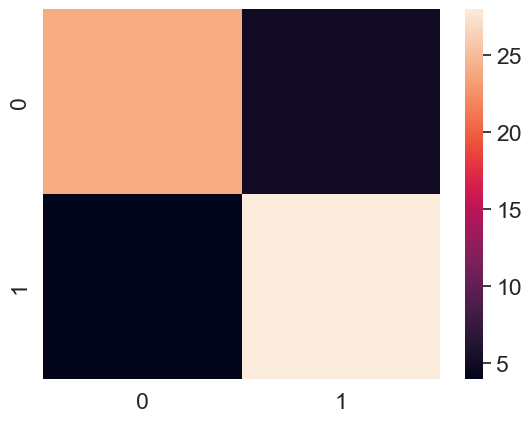

In [55]:
# make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns
# set the font scale
sns.set(font_scale =1.5)
# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
# plot it using Seaborn
sns.heatmap(conf_mat);

In [56]:
!pip install --upgrade scikit-learn

In [57]:
import sklearn
sklearn.show_versions()


System:
    python: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\rakab\Desktop\sample_project_1\env\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.7.0
          pip: 25.1
   setuptools: 72.1.0
        numpy: 2.2.4
        scipy: 1.15.2
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 16
         prefix: mkl_rt
       filepath: C:\Users\rakab\Desktop\sample_project_1\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 22
         prefix: vcomp
       filepath: C:\Users\rakab\Desktop\sample_project_1\env\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: openmp
   internal_api: openmp
  

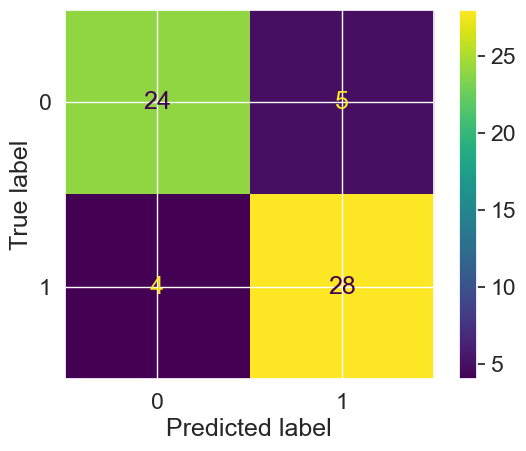

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [60]:
disease_true = np.zeros(10000)
disease_true[0] = 1
disease_true[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
disease_preds = np.zeros(10000)
print(classification_report(disease_true, disease_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\rakab\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rakab\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\rakab\Desktop\sample_project_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [62]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn. ensemble import RandomForestRegressor
np.random.seed(42)
x= housing_df.drop("target", axis=1)
y = housing_df["target"]
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# create random Forest Model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# now check the scores

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
model.score(x_test, y_test)

0.806652667101436

In [64]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [66]:
y_test_mean = np.full(len(y_test), y_test.mean())

In [67]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [68]:
y_preds = model.predict(x_test)
y_preds

array([0.4939   , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67781  ], shape=(4128,))

In [69]:
from sklearn.metrics import r2_score
r2_score( y_test, y_preds)
     

0.806652667101436

In [70]:
x_test.shape

(4128, 8)

In [71]:
y_preds.shape

(4128,)

In [72]:
y_preds.reshape(-1)


array([0.4939   , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67781  ], shape=(4128,))

In [73]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32656738464147306

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds)

0.25336408094921037

In [75]:
df = pd.DataFrame(data={"actual values": y_test, 
                        "predicted values": y_preds})
df["differences"] = df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [76]:
np.square(df["differences"]).mean()

np.float64(0.25336408094921037)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
# create x and y
x = heart_disease.drop("target", axis = 1)
y =heart_disease["target"]
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#  create classifier model instance
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
np.random.seed(42)
# cross_validation Accuracy
cv_acc =cross_val_score(model, x, y, cv =5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [80]:
# cross validation precision
np.random.seed(42)
cv_precision = cross_val_score(model, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [81]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.model_selection import cross_val_score
from sklearn. ensemble import RandomForestRegressor
np.random.seed(42)
x= housing_df.drop("target", axis=1)
y = housing_df["target"]
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# create random Forest Model
model = RandomForestRegressor()
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [82]:
# cross_validation r2
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring=None)
cv_r2

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [84]:
np.mean(cv_r2)

np.float64(0.6521550148270838)

### Tunnining hyperparameter by hand

In [83]:
def evaluate_preds(y_true, y_preds):
  """
  perform evoluation comparaison on x_true label vs y_preds labels
  """
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict ={"Accuracy": round(accuracy, 2),
              "Precision": round(precision, 2),
              "recall": round(recall, 2),
              "F1": round(f1, 2)}
  print(f"Accuracy:{accuracy* 100: .2f}%")
  print(f"Precision:{ precision:.2f}")
  print(f"Recall:{recall:.2f}")
  print(f"F1:{f1:.2f}")
  return metric_dict


In [84]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
heart_disease_shuffted = heart_disease.sample(frac=1)
heart_disease_shuffted

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
np.random.seed(42)
## shuffled data first before
## split data into x and y
x = heart_disease_shuffted.drop("target", axis=1)
y = heart_disease_shuffted["target"]

## split data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffted)) # 70% of all the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffted)) # 15% of the data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split: valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# use of the model 

clf = RandomForestClassifier(10000)
clf.fit(x_train, y_train)
# make prediction
y_preds = clf.predict(x_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics








Accuracy: 84.44%
Precision:0.90
Recall:0.88
F1:0.89


{'Accuracy': 0.84, 'Precision': 0.9, 'recall': 0.88, 'F1': 0.89}

In [87]:
np.random.seed(42)
clf_2 = RandomForestClassifier(1000)
clf_2.fit(x_train, y_train)

# Makes prediction
y_preds_2 = clf_2.predict(x_valid)
# Evaluate the 2 classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 84.44%
Precision:0.90
Recall:0.88
F1:0.89


In [88]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [89]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
clf_3.fit(x_train, y_train)
## Makes prediction
y_preds_3 = clf_3.predict(x_valid)
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 84.44%
Precision:0.90
Recall:0.88
F1:0.89


### Tunning hyperparameter by RnadomizedSearch

In [95]:
from sklearn.model_selection import RandomizedSearchCV
grid ={ "n_estimators": [ 10, 100, 200, 500, 1000, 1200],
       "max_depth": [ None, 5, 10, 20, 30],
       "max_features": ["log2", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)
# split into x and y
x = heart_disease_shuffted.drop("target", axis = 1)
y = heart_disease_shuffted["target"]
# split into train, test sets
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size =0.2)
# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)
## setup RandomizedSearchCV 
rs_clf = RandomizedSearchCV( estimator= clf, 
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)
# fit the RandomizedSearchCv version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

,estimator,RandomForestC...fier(n_jobs=1)
,param_distributions,"{'max_depth': [None, 5, ...], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [96]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [97]:
## Make prediction
rs_y_preds = rs_clf.predict(x_test)
# Evaluate the prediction
rs_metrics = evaluate_preds(y_test, rs_y_preds)


Accuracy: 83.61%
Precision:0.80
Recall:0.94
F1:0.86


### 5.3 Hyperparameter tuning with GridSearchCV

In [98]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [99]:
grid_2 = { "n_estimators": [ 100, 200, 500],
       "max_depth": [ None ],
       "max_features": ["sqrt"],
       "min_samples_split": [ 6],
       "min_samples_leaf": [1, 2]}


In [101]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
# split into x and y
x = heart_disease_shuffted.drop("target", axis = 1)
y = heart_disease_shuffted["target"]
# split into train, test sets
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size =0.2)
# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs =1)

## setup GridSearch

gs_clf =GridSearchCV( estimator= clf, 
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)
# fit the  GridSearchCV version of clf
gs_clf.fit(x_train, y_train);


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

In [102]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [104]:
gs_y_preds =gs_clf.predict(x_test)
# evaluate the prediction
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 80.33%
Precision:0.76
Recall:0.94
F1:0.84


## let;s compare our different models metrics.

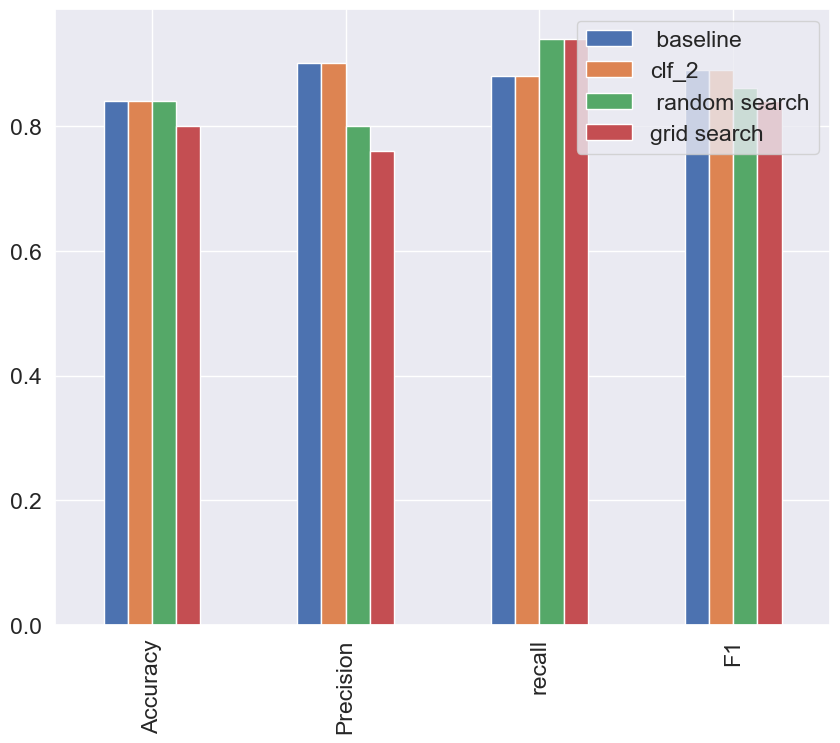

In [105]:
compare_metrics = pd.DataFrame({" baseline": baseline_metrics,
                               "clf_2":clf_2_metrics,
                                " random search":rs_metrics,
                                "grid search": gs_metrics}
                              )
compare_metrics.plot.bar(figsize =(10, 8));

## 67. saving and load trained machine learning model
Two  ways to save and load machine learning models:
1. with python's pickle module
2. with the joblib module

   Pickle

In [106]:
import pickle

# save an extisting model to file
pickle.dump(gs_clf, open("random_Fores_classifier_model.pk1", "wb"))

In [107]:
# Load a saved model
loaded_pickle_model = pickle.load(open("random_fores_classifier_model.pk1", "rb"))

In [108]:
# make some predictions
p_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, p_y_preds)

Accuracy: 80.33%
Precision:0.76
Recall:0.94
F1:0.84


{'Accuracy': 0.8, 'Precision': 0.76, 'recall': 0.94, 'F1': 0.84}

###  write the code in one cell

In [117]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#nModeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

# Import data drop rows with missing labels
data =pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace =True)

# Define different features and transformer pipline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy="constant", fill_value ="missing")),
    ("onehot", OneHotEncoder(handle_unknown ="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy ="constant", fill_value =4))])
numeric_features =["Odometer (KM)"]
numeric_transformer = Pipeline (steps=[
    ("imputer", SimpleImputer(strategy ="mean"))])

# setup preprocessing step ( fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers =[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)
    ])
# creating a preprocessing and modeling pipeline
model = Pipeline( steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])
# split data
x = data.drop("Price", axis=1)
y= data["Price"]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

# fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.22188417408787875

In [119]:
# GridSearchcv with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid ={
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators": [ 100, 1000],
    "model__max_depth": [None, 5 ],
    "model__max_features":["log2"],
    "model__min_samples_split": [2, 4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=log2, model__min_sampl

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'model__max_depth': [None, 5], 'model__max_features': ['log2'], 'model__min_samples_split': [2, 4], 'model__n_estimators': [100, 1000], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('door', ...), ...]"


In [121]:
gs_model.score(x_test, y_test)

0.2848784564026805